# Hands-on Session for Image Mining 1

Credit to: [Youngeui Kim](https://cis.appstate.edu/directory/youngeui-kim-phd), [Yuxiao (Rain) Luo](https://yuxiaoluo.github.io)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/YuxiaoLuo/AI_Intro/blob/main/week11_ImageMining_1.ipynb)

This session introduces how to detect objects in an image using Python library.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
filename = 'data/week11_person.JPG' # edit the format (.jpg) appropriately

## Let's try MobileNet
Load pre-trained algorithms (i.e., MobileNet)

In [3]:
mobile = tf.keras.applications.mobilenet.MobileNet()

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Pre-process the image.

In [4]:
from tensorflow.keras.preprocessing import image
img = image.load_img(filename, target_size = (224, 224))
resized_img = image.img_to_array(img)
final_image = np.expand_dims(resized_img, axis=0)  #need fourth dimension
final_image = tf.keras.applications.mobilenet.preprocess_input(final_image)
plt.imshow(img)

FileNotFoundError: [Errno 2] No such file or directory: 'data/week11_person.JPG'

Run the prediction

In [ ]:
from tensorflow.keras.applications import imagenet_utils
predictions = mobile.predict(final_image)
results = imagenet_utils.decode_predictions(predictions, top = 10)

Print out the results

In [ ]:
print(*results[0], sep = "\n")

## Let's try  a different pre-trained algorithms (i.e., MobileNet V2)

In [ ]:
mobile = tf.keras.applications.mobilenet_v2.MobileNetV2()
predictions = mobile.predict(final_image)
results = imagenet_utils.decode_predictions(predictions, top = 10)

In [ ]:
print(*results[0], sep = "\n")

Last,
- Try more classification algorithms here: https://www.tensorflow.org/api_docs/python/tf/keras/applications/mobilenet/preprocess_input
- E.g., `tf.keras.applications.ResNet50`, `tf.keras.applications.ResNet50V2`

In [5]:
# Import libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import imagenet_utils
from google.colab import files
from PIL import Image
import io

In [6]:
# Upload an image file
uploaded = files.upload()  # Select your image file (.jpg, .png, etc.)
filename = next(iter(uploaded))  # Get uploaded filename

Saving week11_person.JPG to week11_person.JPG


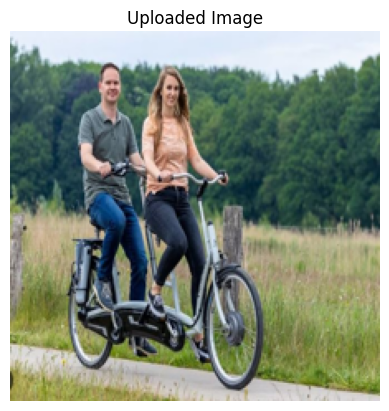

In [7]:
# Load and preprocess the image
img = Image.open(io.BytesIO(uploaded[filename])).convert('RGB')
img = img.resize((224, 224))  # Resize to MobileNet input size
resized_img = image.img_to_array(img)
final_image = np.expand_dims(resized_img, axis=0)  # Add batch dimension
final_image = tf.keras.applications.mobilenet.preprocess_input(final_image)

# Display the uploaded image
plt.imshow(img)
plt.axis('off')
plt.title("Uploaded Image")
plt.show()

In [8]:
# Run prediction using MobileNet
mobile = tf.keras.applications.mobilenet.MobileNet()
predictions = mobile.predict(final_image)
results = imagenet_utils.decode_predictions(predictions, top=10)
print("Results from MobileNet:")
print(*results[0], sep="\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Results from MobileNet:
('n02835271', 'bicycle-built-for-two', np.float32(0.59810483))
('n03785016', 'moped', np.float32(0.182976))
('n03792782', 'mountain_bike', np.float32(0.11612054))
('n04482393', 'tricycle', np.float32(0.03980794))
('n03127747', 'crash_helmet', np.float32(0.016123163))
('n04509417', 'unicycle', np.float32(0.008633984))
('n03594734', 'jean', np.float32(0.0030650897))
('n03124170', 'cowboy_hat', np.float32(0.0029690617))
('n03124043', 'cowboy_boot', np.float32(0.0028673552))
('n02999410', 'chain', np.float32(0.002398974))


In [9]:
# Run prediction using MobileNetV2
mobile_v2 = tf.keras.applications.mobilenet_v2.MobileNetV2()
predictions_v2 = mobile_v2.predict(final_image)
results_v2 = imagenet_utils.decode_predictions(predictions_v2, top=10)
print("\nResults from MobileNetV2:")
print(*results_v2[0], sep="\n")

14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step

Results from MobileNetV2:
('n02835271', 'bicycle-built-for-two', np.float32(0.5334784))
('n04482393', 'tricycle', np.float32(0.053922612))
('n03785016', 'moped', np.float32(0.052352253))
('n03792782', 'mountain_bike', np.float32(0.015384211))
('n09193705', 'alp', np.float32(0.0053100185))
('n03538406', 'horse_cart', np.float32(0.004618275))
('n03599486', 'jinrikisha', np.float32(0.00412598))
('n07802026', 'hay', np.float32(0.0038526463))
('n02109961', 'Eskimo_dog', np.float32(0.003016994))
('n03444034', 'go-kart', np.float32(0.0029497414))
